In [1]:
import os
import pandas as pd
import optuna
import numpy as np
from qiskit.circuit import QuantumCircuit

import qtpu

from benchmark._plot_util import *

from benchmark.ansatz import generate_ansatz, qaoa2, qaoa1
from benchmark.exec_ckt import cut_ckt
from qtpu.compiler.compiler import  compile_reach_size
from benchmark.util import get_info, append_to_csv
from qtpu.circuit import cuts_to_moves
from circuit_knitting.cutting.qpd import TwoQubitQPDGate

In [2]:
QPU_SIZE = 15


benches = {
    # "vqe": [generate_ansatz("linear", n, 2) for n in range(100, 101, 20)],
    "qml": [(generate_ansatz("zz", n, 2)) for n in range(20, 201, 40)],
    "vqe": [(generate_ansatz("linear", n, 2)) for n in range(20, 201, 40)],
    "qaoa1": [qaoa1(n, 10, 2) for n in range(2, 21, 4)],
    "qaoa2": [(qaoa2(n, 10, 2)) for n in range(2, 21, 4)],
}

[[20, 21, 22]]
[[60, 61, 62], [63, 64, 65], [66, 67, 68], [69, 70, 71], [72, 73, 74]]
[[100, 101, 102], [103, 104, 105], [106, 107, 108], [109, 110, 111], [112, 113, 114], [115, 116, 117], [118, 119, 120], [121, 122, 123], [124, 125, 126]]
[[140, 141, 142], [143, 144, 145], [146, 147, 148], [149, 150, 151], [152, 153, 154], [155, 156, 157], [158, 159, 160], [161, 162, 163], [164, 165, 166], [167, 168, 169], [170, 171, 172], [173, 174, 175], [176, 177, 178]]
[[180, 181, 182], [183, 184, 185], [186, 187, 188], [189, 190, 191], [192, 193, 194], [195, 196, 197], [198, 199, 200], [201, 202, 203], [204, 205, 206], [207, 208, 209], [210, 211, 212], [213, 214, 215], [216, 217, 218], [219, 220, 221], [222, 223, 224], [225, 226, 227], [228, 229, 230]]


In [3]:
def overhead(circuit):
    circuit = cuts_to_moves(circuit)
    return np.sum(
        [
            instr.operation.basis.overhead
            for instr in circuit
            if isinstance(instr.operation, TwoQubitQPDGate)
        ]
    )
    # return sum(
    #     [
    #         np.log10(instr.operation.basis.overhead)
    #         for instr in circuit
    #         if isinstance(instr.operation, TwoQubitQPDGate)
    #     ]
    # )


for name, bench_list in benches.items():
    for bench in bench_list:
        cut_circ = compile_reach_size(bench, QPU_SIZE, show_progress_bar=True)
        qtpu_res = {"qtpu_overhead": overhead(cut_circ)}
        print(overhead(cut_circ))


        cut_circ = cut_ckt(bench, QPU_SIZE)
        print(overhead(cut_circ))
        ckt_res = {"ckt_overhead": overhead(cut_circ)}
        append_to_csv("results/compiler2.csv", {"name": name, "num_qubits": bench.num_qubits, **qtpu_res, **ckt_res})

  0%|          | 0/100 [00:00<?, ?it/s]

True
52.0
Found solution using 6 cuts with a sampling overhead of 531441.0.
54.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met


/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met


/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


Termination condition not met


/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
162.0
Found solution using 24 cuts with a sampling overhead of 7.976644307687251e+22.
216.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met


/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


True
378.0
Found solution using 42 cuts with a sampling overhead of 1.197251518256202e+40.
378.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
1212.

  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met


/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


True
756.0
Found solution using 72 cuts with a sampling overhead of 5.075287860564157e+68.
648.0


  0%|          | 0/100 [00:00<?, ?it/s]

True
27.0
Found solution using 3 cuts with a sampling overhead of 729.0.
27.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
81.0
Found solution using 9 cuts with a sampling overhead of 387420489.0.
81.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
162.0
Found solution using 18 cuts with a sampling overhead of 1.5009463529699914e+17.
162.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
243.0
Found solution using 27 cuts with a sampling overhead of 5.814973700304006e+25.
243.0


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
324.0
Found solution using 33 cuts with a sampling overhead of 3.090315438263261e+31.
297.0


  0%|          | 0/100 [00:00<?, ?it/s]

True
18.69495817772171
Found solution using 3 cuts with a sampling overhead of 28.946629959395302.
18.69495817772171


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
187.60784378838773
Found solution using 47 cuts with a sampling overhead of 2.8173210699471015e+32.
264.41744299191663


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
272.0564856402962
Found solution using 77 cuts with a sampling overhead of 7.223995100655873e+49.
407.70770365664595


  0%|          | 0/100 [00:00<?, ?it/s]

/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/cotengra/hyperoptimizers/hyper.py:307: UserWarning: Trial error: Optimization timed out. Set `HyperOptimizer` kwarg `on_trial_error='raise'` to raise this error, or `on_trial_error='ignore'` to silence.
  warnings.warn(


Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
488.26056536332186
Found solution using 116 cuts with a sampling overhead of 2.16157498672704e+83.
693.9778890678085


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
582.2626234015769
Found solution using 131 cuts with a sampling overhead of 6.923540987733894e+91.
759.3012490919025


  0%|          | 0/100 [00:00<?, ?it/s]

True
16.270959536511473
Found solution using 3 cuts with a sampling overhead of 152.18190886549783.
16.270959536511473


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
True
84.26271646772867
Found solution using 42 cuts with a sampling overhead of 9.668155835295273e+26.
216.28735832548244


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
True
297.2608514809549
Found solution using 64 cuts with a sampling overhead of 1.875999584714943e+42.
349.64031250890235


  0%|          | 0/100 [00:00<?, ?it/s]

Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
Termination condition not met
[W 2024-09-25 17:31:52,799] Trial 57 failed with parameters: {'compress': 'none', 'choose_leaf': 'nodes', 'random_strength': 8.58302122197351, 'weight_edges': 'const', 'imbalance': 0.2328491098631193, 'imbalance_decay': -2.053634059333999, 'parts': 16, 'parts_decay': 0.63868182457678, 'mode': 'direct', 'objective': 'cut', 'fix_output_nodes': ''} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "/home/di75piq/qtpu/.venv/lib/python3.11/site-packages/optuna/study/_optimize

KeyboardInterrupt: 

In [4]:
def plot_bar(df, ax, x, y, yerr=None):
    df.plot.bar(
        x=x, y=y, rot=0, width=0.8, edgecolor="black", linewidth=2, ax=ax, legend=False, yerr=yerr
    )

    hatches = ["**", "//", "oo", "xx", "oo", "OO"]

    color_to_hatch = {}

    i = 0
    for patch in ax.patches:
        if patch.get_facecolor() not in color_to_hatch:
            color_to_hatch[patch.get_facecolor()] = hatches[i % len(hatches)]
            i += 1

    for patch in ax.patches:
        patch.set_hatch(color_to_hatch[patch.get_facecolor()])

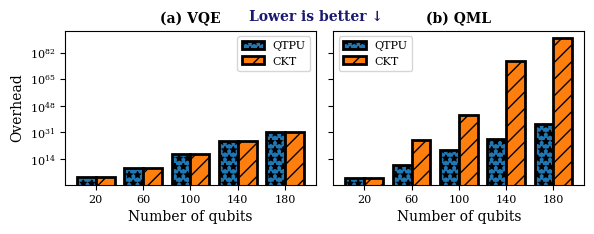

In [5]:
df = pd.read_csv("results/compiler.csv")

df_vqe = df[df["name"] == "vqe"]
df_vqe = df_vqe.groupby(["name", "num_qubits"]).mean().reset_index().copy()

df_qml = df[df["name"] == "qaoa2"]
df_qml = df_qml.groupby(["name", "num_qubits"]).mean().reset_index().copy()



fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(6.7, 2), sharey=True)
fig.subplots_adjust(wspace=0.07)

# df_vqe["qtpu_overhead"] **= 10
# df_qml["qtpu_overhead"] **= 10
# df_vqe["ckt_overhead"] **= 10
# df_qml["ckt_overhead"] **= 10

plot_bar(df_vqe, ax0, "num_qubits", None)
plot_bar(df_qml, ax1, "num_qubits", None)

ax0.set_ylabel("Overhead")
ax0.set_xlabel("Number of qubits")
ax1.set_xlabel("Number of qubits")

ax0.set_title("(a) VQE", fontweight="bold")
ax1.set_title("(b) QML", fontweight="bold")
ax0.legend(["QTPU", "CKT"])
ax1.legend(["QTPU", "CKT"])

fig.text(0.5, .95, "Lower is better ↓", ha='center', va='center', fontweight="bold", color="midnightblue")
ax0.set_yscale("log")

In [6]:
fig.savefig("compiler.pdf", bbox_inches="tight")